# F1 Winner Prediction - Linear Regression Model
Train and evaluate a linear regression model to predict F1 race winners.

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
)
import pickle
import joblib

## Load Processed Data

In [ ]:
print("Loading preprocessed data...")

# Load preprocessed data
X_train = pd.read_parquet("../data/processed/X_train.parquet")
y_train = pd.read_parquet("../data/processed/y_train.parquet")
X_test = pd.read_parquet("../data/processed/X_test.parquet")
y_test = pd.read_parquet("../data/processed/y_test.parquet")

print("Loading features and scalars...")

# Load scalers
with open("../data/processed/scalers.pkl", "rb") as f:
    scalers = pickle.load(f)

# Load metadata and features
with open("../data/processed/metadata.json", "r") as f:
    metadata = json.load(f)

print("Data loaded successfully!")

print("")
print("Data Summary:")
print(f"Training: {X_train.shape}")
print(f"Test: {X_test.shape}")

print("")
print(f"Features: {metadata['feature_names']}")

print("")
print(f"Training samples: {metadata['train_samples']}")
print(f"Test samples: {metadata['test_samples']}")


Loading preprocessed data...
Loading features and scalars...
Data loaded successfully!

Data Summary:
Training: (4637, 10)
Test: (1799, 10)

Features: ['driver_win_rate', 'constructor_win_rate', 'qualifying_position', 'num_pit_stops', 'grid', 'year', 'driver_constructor_interaction', 'points_per_race', 'recent_avg_position', 'constructor_recent_wins']

Training samples: 4637
Test samples: 4637


## Train Linear Regression Model

In [62]:
print("Training the model...")

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")

print("")
print("Summary:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Training the model...
Model trained successfully!

Summary:
Coefficients: [[ 0.45221399 -1.08796909 -0.00267946 -0.01418736 -0.05018564 -0.00249425
   0.02513077 -0.00332675 -0.00249523  0.92280547]]
Intercept: [0.03410575]


## Feature Importance Analysis

### Updates - I

1. Here we will compare the feature importance of existing with newly added features.
2. `constructor_recent_wins`, `points_per_race` are the newly added features.
3. Here we can see that one of the newly added features has a significant impact on the predictions.
4. At the same time, few are low impact features.

Feature Importance:
                          feature  coefficient  abs_coefficient
1            constructor_win_rate    -1.087969         1.087969
9         constructor_recent_wins     0.922805         0.922805
0                 driver_win_rate     0.452214         0.452214
4                            grid    -0.050186         0.050186
6  driver_constructor_interaction     0.025131         0.025131
3                   num_pit_stops    -0.014187         0.014187
7                 points_per_race    -0.003327         0.003327
2             qualifying_position    -0.002679         0.002679
8             recent_avg_position    -0.002495         0.002495
5                            year    -0.002494         0.002494



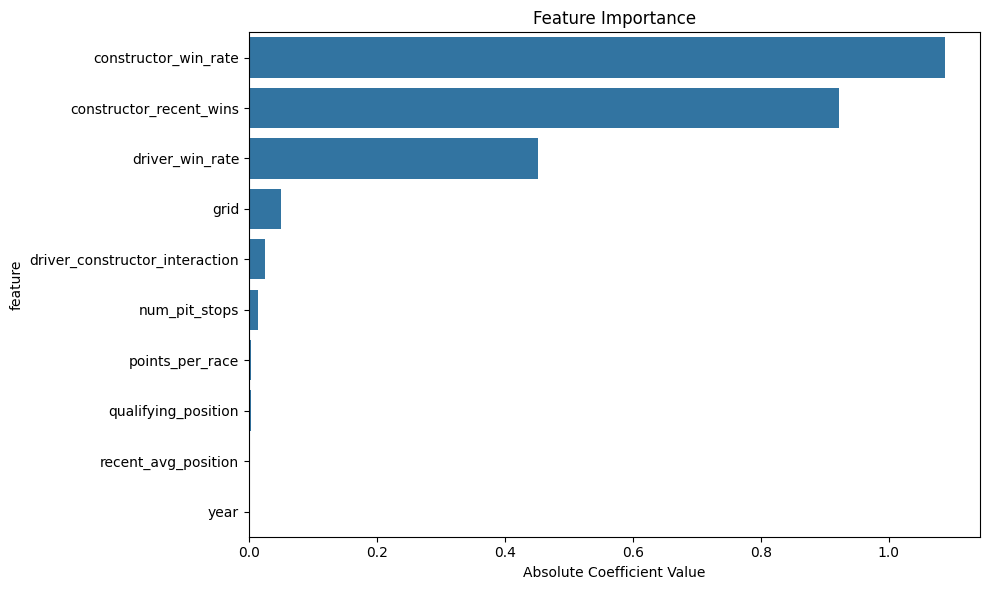

In [ ]:
# Analyze feature importance
feature_importance = pd.DataFrame(
    {
        "feature": metadata["feature_names"],
        "coefficient": model.coef_.flatten(),
        "abs_coefficient": np.abs(model.coef_.flatten()),
    }
).sort_values("abs_coefficient", ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plot feature importance
print("")
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x="abs_coefficient", y="feature")
plt.title("Feature Importance")
plt.xlabel("Absolute Coefficient Value")

plt.tight_layout()
plt.show()

# Predictions

Prepare predictions on data

1. Using the Liner Regression model, prepare the predictions on training and test data
2. Calculate the range of predictions on training and test datasets.

## Model Predictions

In [ ]:
print("Preparing to make predictions...")

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Predictions completed!")

print("")
print(
    f"Training predictions range: {y_train_pred.min():.3f} to {y_train_pred.max():.3f}"
)
print(f"Test predictions range: {y_test_pred.min():.3f} to {y_test_pred.max():.3f}")

# Previous predictions
# Training predictions range: -0.747 to 0.911
# Test predictions range: -0.336 to 0.922

Preparing to make predictions...
Predictions completed!

Training predictions range: -0.747 to 0.911
Test predictions range: -0.336 to 0.922


## Model Evaluation

Evaluate model performance

1. Using MSE and R2 scores for performance analysis.
2. Compare the results on each run for evaluating model performance.

In [65]:
print("Collecting performance metrics...")

# Regression metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

print("")
print(f"Training R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

# Round 1:
# Training MSE: 0.0339
# Test MSE: 0.0314
# Training R2: 0.2330
# Test R2: 0.3385

# Round 2:
# Training MSE: 0.0340
# Test MSE: 0.0313
# Training R2: 0.2310
# Test R2: 0.3405

# Round 3:
# Training MSE: 0.0224
# Test MSE: 0.0213
# Training R2: 0.4929
# Test R2: 0.5512

Training MSE: 0.0224
Test MSE: 0.0213

Training R2: 0.4929
Test R2: 0.5512


In [66]:
# Convert to classification for evaluation
threshold = 0.5
y_train_pred_class = (y_train_pred > threshold).astype(int)
y_test_pred_class = (y_test_pred > threshold).astype(int)

print(f"Using threshold: {threshold}")

print("")
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred_class))

print("")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_class))


Using threshold: 0.5

Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4422
           1       0.83      0.55      0.66       215

    accuracy                           0.97      4637
   macro avg       0.90      0.77      0.82      4637
weighted avg       0.97      0.97      0.97      4637


Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1709
           1       0.81      0.68      0.74        90

    accuracy                           0.98      1799
   macro avg       0.90      0.83      0.86      1799
weighted avg       0.97      0.98      0.98      1799



## Prediction Analysis

Analyze the predictions of the model

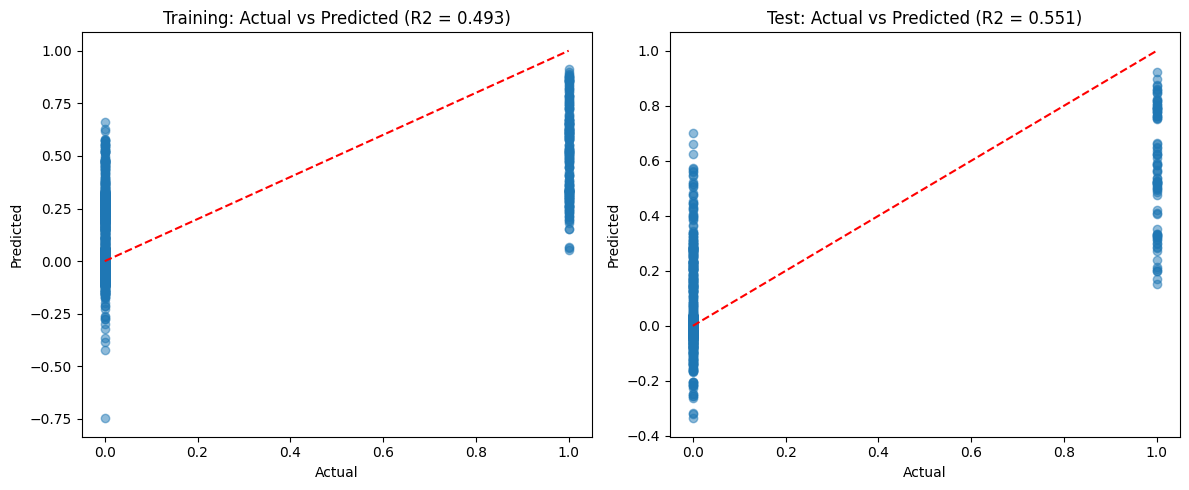

In [ ]:
# Analyze predictions vs actual
plt.figure(figsize=(12, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Training: Actual vs Predicted (R2 = {train_r2:.3f})")

# Test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Test: Actual vs Predicted (R2 = {test_r2:.3f})")

plt.tight_layout()
plt.show()

Confusion Matrix:
[[1695   14]
 [  29   61]]


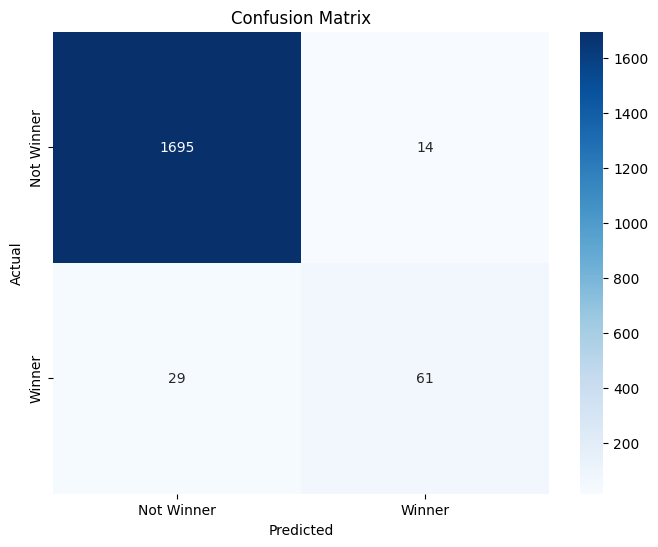

In [ ]:
# Convert predictions to binary (0/1) using threshold
threshold = 0.5
y_test_pred_class = (y_test_pred > threshold).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)

print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Winner", "Winner"],
    yticklabels=["Not Winner", "Winner"],
)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## Race-by-Race Analysis

In [ ]:
def add_predictions_to_test_data(test_data_path, y_test_pred, y_test_pred_class):
    """Load test data and add prediction columns."""
    test_data = pd.read_csv(test_data_path)
    test_data["predicted_win_prob"] = y_test_pred
    test_data["predicted_winner"] = y_test_pred_class
    return test_data


def calculate_race_accuracy(test_data):
    """Calculate race-by-race prediction accuracy using vectorized operations."""
    # Get predicted winner for each race (highest probability)
    predicted_winners = test_data.loc[
        test_data.groupby("raceId")["predicted_win_prob"].idxmax()
    ][["raceId", "driverId"]].rename(columns={"driverId": "predicted_driverId"})

    # Get actual winners for each race
    actual_winners = test_data[test_data["is_winner"] == 1][
        ["raceId", "driverId"]
    ].rename(columns={"driverId": "actual_driverId"})

    # Merge and check correctness
    race_results = predicted_winners.merge(actual_winners, on="raceId", how="left")
    race_results["correct_prediction"] = (
        race_results["predicted_driverId"] == race_results["actual_driverId"]
    )

    # Add max probability for each race
    max_probs = test_data.groupby("raceId")["predicted_win_prob"].max()
    race_results["max_prob"] = race_results["raceId"].map(max_probs)

    return race_results[["raceId", "correct_prediction", "max_prob"]]


test_data_full = add_predictions_to_test_data(
    "../data/processed/test_data_with_ids.csv", y_test_pred, y_test_pred_class
)

race_accuracy_df = calculate_race_accuracy(test_data_full)

overall_accuracy = race_accuracy_df["correct_prediction"].mean()
correct_count = race_accuracy_df["correct_prediction"].sum()
total_races = len(race_accuracy_df)

print(f"Race-by-race prediction accuracy: {overall_accuracy:.3f}")
print(f"Correctly predicted {correct_count} out of {total_races} races")


Race-by-race prediction accuracy: 0.767
Correctly predicted 69 out of 90 races


## Save Model

In [ ]:
print("Saving the model...")

# Save the trained model
joblib.dump(model, "../models/f1_winner_linear_regression.joblib")

print("Saving the predictions...")

# Save predictions as parquet
train_pred_df = pd.DataFrame({"y_train_pred": y_train_pred.flatten()})
test_pred_df = pd.DataFrame({"y_test_pred": y_test_pred.flatten()})

train_pred_df.to_parquet("../results/train_predictions.parquet")
test_pred_df.to_parquet("../results/test_predictions.parquet")

print("Saving feature importance...")

# Save feature importance as parquet
feature_importance.to_parquet("../results/feature_importance.parquet")

print("Saving the performance metrics...")

# Save model performance metrics
metrics_df = pd.DataFrame(
    {
        "metric": [
            "train_mse",
            "test_mse",
            "train_r2",
            "test_r2",
            "race_accuracy",
            "threshold",
        ],
        "value": [train_mse, test_mse, train_r2, test_r2, overall_accuracy, threshold],
    }
)

metrics_df.to_parquet("../results/model_metrics.parquet", index=False)

print("Model and results saved successfully!")

print("")
print("Model Summary:")
print(f"- Test MSE Score: {test_mse:.3f}")
print(f"- Test R2 Score: {test_r2:.3f}")
print(f"- Race Prediction Accuracy: {overall_accuracy:.3f}")
print(f"- Most Important Feature: {feature_importance.iloc[0]['feature']}")
print(
    f"- Most Important Features (Top 3): {feature_importance.iloc[:3]['feature'].tolist()}"
)

Saving the model...
Saving the predictions...
Saving feature importance...
Saving the performance metrics...
Model and results saved successfully!

Model Summary:
- Test MSE Score: 0.021
- Test R2 Score: 0.551
- Race Prediction Accuracy: 0.767
- Most Important Feature: constructor_win_rate
- Most Important Features (Top 3): ['constructor_win_rate', 'constructor_recent_wins', 'driver_win_rate']
